In [30]:
import pandas as pd
df = pd.read_csv('EURUSD.csv')
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-15,1.067635,1.072559,1.060738,1.067635,1.067635,0
1,2022-12-16,1.064056,1.066325,1.059940,1.064056,1.064056,0
2,2022-12-19,1.058504,1.065900,1.057720,1.058504,1.058504,0
3,2022-12-20,1.061458,1.065553,1.058067,1.061458,1.061458,0
4,2022-12-21,1.062699,1.064351,1.059704,1.062699,1.062699,0
...,...,...,...,...,...,...,...
257,2023-12-11,1.076577,1.077935,1.074322,1.076577,1.076577,0
258,2023-12-12,1.076658,1.082204,1.076183,1.076658,1.076658,0
259,2023-12-13,1.079867,1.080824,1.077400,1.079867,1.079867,0
260,2023-12-14,1.088613,1.100413,1.088021,1.088613,1.088613,0


In [31]:
df = df[['Date','Close']]
df

,Date,Close
0,2022-12-15,1.067635
1,2022-12-16,1.064056
2,2022-12-19,1.058504
3,2022-12-20,1.061458
4,2022-12-21,1.062699
...,...,...
257,2023-12-11,1.076577
258,2023-12-12,1.076658
259,2023-12-13,1.079867
260,2023-12-14,1.088613


In [32]:
df['Date']

0      2022-12-15
1      2022-12-16
2      2022-12-19
3      2022-12-20
4      2022-12-21
          ...    
257    2023-12-11
258    2023-12-12
259    2023-12-13
260    2023-12-14
261    2023-12-15
Name: Date, Length: 262, dtype: object

In [33]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2023-12-15')
datetime_object

datetime.datetime(2023, 12, 15, 0, 0)

In [34]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-34-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0     2022-12-15
1     2022-12-16
2     2022-12-19
3     2022-12-20
4     2022-12-21
         ...    
257   2023-12-11
258   2023-12-12
259   2023-12-13
260   2023-12-14
261   2023-12-15
Name: Date, Length: 262, dtype: datetime64[ns]

In [35]:
df.index = df.pop('Date')
df

,Close
Date,
2022-12-15,1.067635
2022-12-16,1.064056
2022-12-19,1.058504
2022-12-20,1.061458
2022-12-21,1.062699
...,...
2023-12-11,1.076577
2023-12-12,1.076658
2023-12-13,1.079867


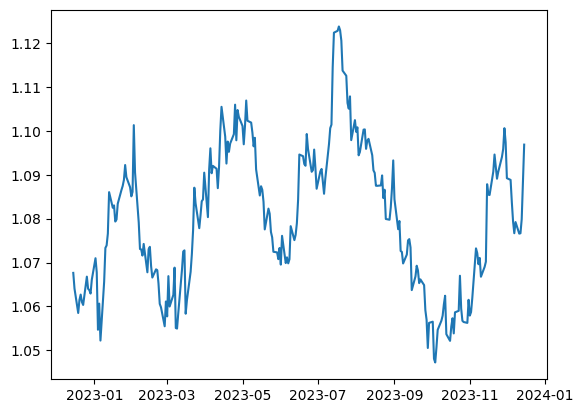

In [36]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [37]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2022-12-20',
                                '2023-12-15',
                                n=3)


In [38]:
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-12-20,1.067635,1.064056,1.058504,1.061458
1,2022-12-21,1.064056,1.058504,1.061458,1.062699
2,2022-12-22,1.058504,1.061458,1.062699,1.061008
3,2022-12-23,1.061458,1.062699,1.061008,1.060333
4,2022-12-26,1.062699,1.061008,1.060333,1.066780
...,...,...,...,...,...
254,2023-12-11,1.079366,1.076670,1.079214,1.076577
255,2023-12-12,1.076670,1.079214,1.076577,1.076658
256,2023-12-13,1.079214,1.076577,1.076658,1.079867
257,2023-12-14,1.076577,1.076658,1.079867,1.088613


In [39]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((259,), (259, 3, 1), (259,))

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 105ms/step - loss: 1.0914 - mean_absolute_error: 1.0435 - val_loss: 0.8756 - val_mean_absolute_error: 0.9357
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.8002 - mean_absolute_error: 0.8933 - val_loss: 0.5828 - val_mean_absolute_error: 0.7634
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.4825 - mean_absolute_error: 0.6917 - val_loss: 0.2719 - val_mean_absolute_error: 0.5214
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.1750 - mean_absolute_error: 0.4083 - val_loss: 0.0336 - val_mean_absolute_error: 0.1832
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0118 - mean_absolute_error: 0.0915 - val_loss: 0.0259 - val_mean_absolute_error: 0.1610
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0369 - mean_absolute_error: 0.1912 - val_loss: 0.0261 - val_mean_absolute_error: 0.1615
Epoch 7/100
7/7 [==========

7/7 [==============================] - 0s 3ms/step


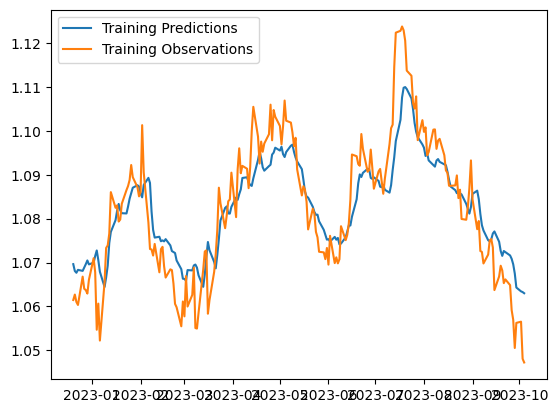

In [42]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 38ms/step


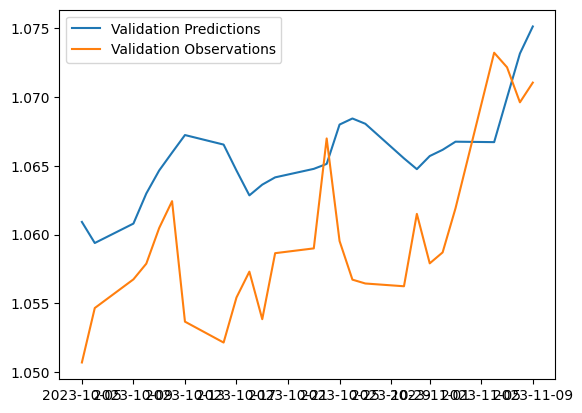

In [43]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 32ms/step


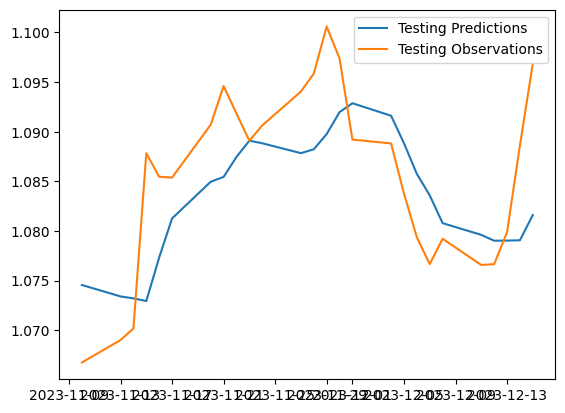

In [44]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

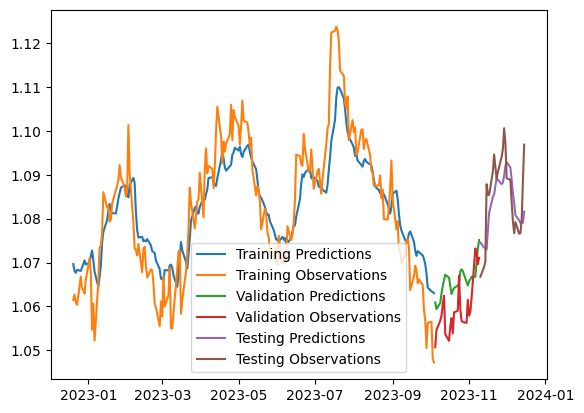

In [45]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [46]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 36ms/step


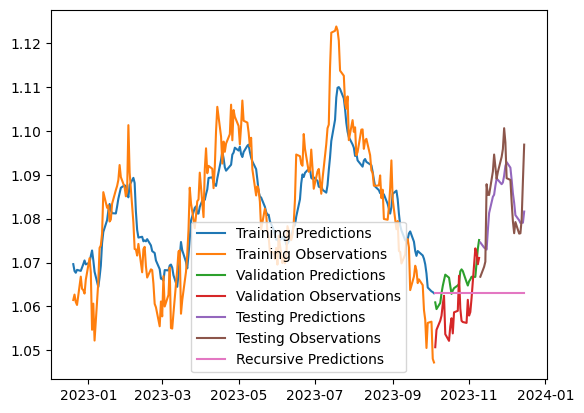

In [47]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

In [48]:
import pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
with open('model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)


In [49]:
input_data = [[1.076670, 1.079214, 1.076577]]


input_data = np.array(input_data)
input_data = np.reshape(input_data, (input_data.shape[0], input_data.shape[1], 1))

result = loaded_model.predict(input_data)
result

1/1 [==============================] - 0s 485ms/step


array([[1.0790186]], dtype=float32)

In [50]:
from tensorflow.keras.models import load_model

model.save('aibot_v1.h5')

In [51]:
from google.colab import files

files.download('aibot_v1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>